In [27]:
import pandas as pd
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import numpy as np
import string
import nltk
from nltk.corpus import stopwords
from gensim.models import Word2Vec #install gensim # had to use this: pip install --upgrade gensim smart_open protobuf==3.20.0
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from scipy.stats import chi2_contingency


In [16]:
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dxcas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\dxcas\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dxcas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\dxcas\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\dxcas\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dxcas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-

True

In [9]:
data = pd.read_pickle('data/data_cleaned.pkl')

In [10]:
data.head()

,comment,parent_comment,label
0,i just want his mutator for that!,"at 0:06, if you look closely you can see that ...",1
1,i am the adultierest.,an adultier adult.,0
2,"take a cold shower, it will help tremendously.","day 7 my balls hurt, i feel dizzy, losing conf...",0
3,"14 hours later, and she has not responded yet.",hard to keep a straight face knowing that the ...,0
4,"""but i am such a nice guy!""",why pandas are not mating,0


### Tokenizing  
Do N-grams at this step

In [11]:
#Unigram Tokenizing
def tokenize_text(text):
    tokens = nltk.word_tokenize(text)
    return tokens

data["comment_tokens"] = data["comment"].apply(tokenize_text)
data["parent_comment_tokens"] = data["parent_comment"].apply(tokenize_text)

In [ ]:
"""
#spellchecking
#%pip install pyspellchecker
from spellchecker import SpellChecker
spell = SpellChecker()
data['comment_tokens'] = data['comment_tokens'].apply(lambda tokens: [spell.correction(token) for token in tokens])
data['parent_comment_tokens'] = data['parent_comment_tokens'].apply(lambda tokens: [spell.correction(token) for token in tokens])
"""

### Removing Stop Words

In [14]:
#remove possible words from stop_words that can change meaning of text
stop_words = set(stopwords.words('english'))

to_remove = ["no","not"]
for word in to_remove:
    stop_words.remove(word)

data["comment_tokens"] = data["comment_tokens"].apply(lambda tokens: [token for token in tokens if token not in stop_words])
data["parent_comment_tokens"] = data["parent_comment_tokens"].apply(lambda tokens: [token for token in tokens if token not in stop_words])

### Lemmatization

In [17]:
lemmatizer = WordNetLemmatizer()
data["comment_tokens"] = data["comment_tokens"].apply(lambda tokens:[lemmatizer.lemmatize(token) for token in tokens])
data["parent_comment_tokens"] = data["parent_comment_tokens"].apply(lambda tokens:[lemmatizer.lemmatize(token) for token in tokens])

### Sentiment Analysis

In [19]:
sia = SentimentIntensityAnalyzer()
data['comment_score'] = data['comment'].apply(lambda x: sia.polarity_scores(x)['compound'])
data['parent_comment_score'] = data['parent_comment'].apply(lambda x: sia.polarity_scores(x)['compound'])

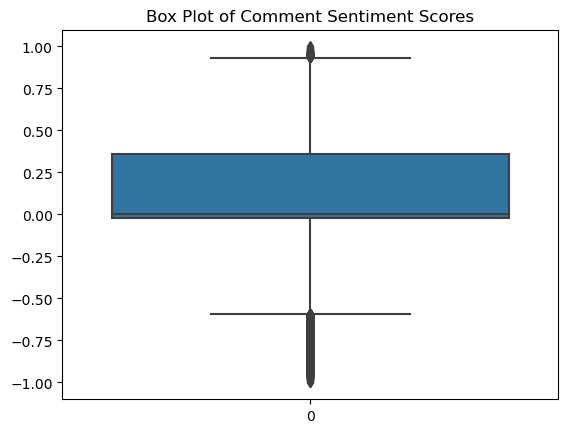

In [21]:
sns.boxplot(data['comment_score'])
plt.title('Box Plot of Comment Sentiment Scores')
plt.show()

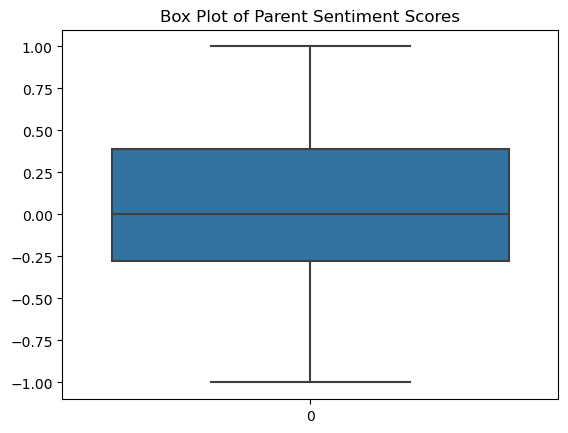

In [22]:
sns.boxplot(data['parent_comment_score'])
plt.title('Box Plot of Parent Sentiment Scores')
plt.show()

C:\Users\dxcas\AppData\Local\Temp\ipykernel_21012\2726375268.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['comment_score'], shade=True, color = 'blue')
C:\Users\dxcas\AppData\Local\Temp\ipykernel_21012\2726375268.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['parent_comment_score'], shade = True, color='red')


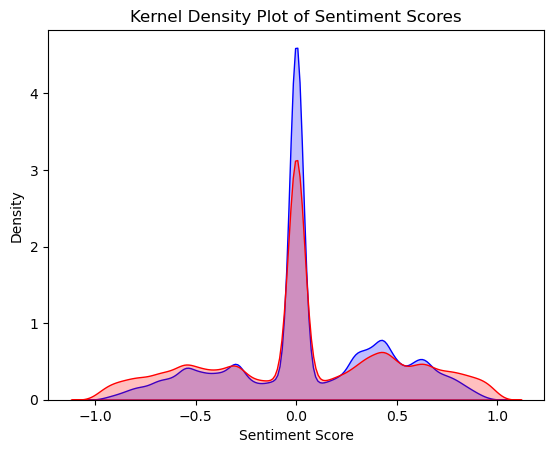

In [23]:
sns.kdeplot(data['comment_score'], shade=True, color = 'blue')
sns.kdeplot(data['parent_comment_score'], shade = True, color='red')
plt.title('Kernel Density Plot of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.show()

In [24]:
def sentiment(score):
    if (score >= 0.25):
        return 'positive'
    elif (score <= -0.25):
        return 'negative'
    else:
        return 'neutral'
    
data['weighted_comment_sentiment_score'] = data['comment_score'].apply(sentiment)
data['weighted_parent_sentiment_score'] = data['parent_comment_score'].apply(sentiment)
data.head()

,comment,parent_comment,label,comment_tokens,parent_comment_tokens,comment_score,parent_comment_score,weighted_comment_sentiment_score,weighted_parent_sentiment_score
0,i just want his mutator for that!,"at 0:06, if you look closely you can see that ...",1,"[want, mutator, !]","[0:06, ,, look, closely, see, fake, two, ball,...",0.1511,-0.4767,neutral,negative
1,i am the adultierest.,an adultier adult.,0,"[adultierest, .]","[adultier, adult, .]",0.0000,0.0000,neutral,neutral
2,"take a cold shower, it will help tremendously.","day 7 my balls hurt, i feel dizzy, losing conf...",0,"[take, cold, shower, ,, help, tremendously, .]","[day, 7, ball, hurt, ,, feel, dizzy, ,, losing...",0.4019,0.3178,positive,positive
3,"14 hours later, and she has not responded yet.",hard to keep a straight face knowing that the ...,0,"[14, hour, later, ,, not, responded, yet, .]","[hard, keep, straight, face, knowing, pillar, ...",0.0000,-0.7876,neutral,negative
4,"""but i am such a nice guy!""",why pandas are not mating,0,"[``, nice, guy, !, '']","[panda, not, mating]",0.6114,0.0000,positive,neutral


In [25]:
contingency_table = pd.crosstab(data['label'], data['weighted_comment_sentiment_score'])

# Display the contingency table
print(contingency_table)

weighted_comment_sentiment_score  negative  neutral  positive
label                                                        
0                                    18844    52174     29948
1                                    21556    45973     33529


In [26]:
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f'Chi-Square Value: {chi2}')
print(f'P-value: {p}')

Chi-Square Value: 775.8141120760291
P-value: 3.420629771991167e-169


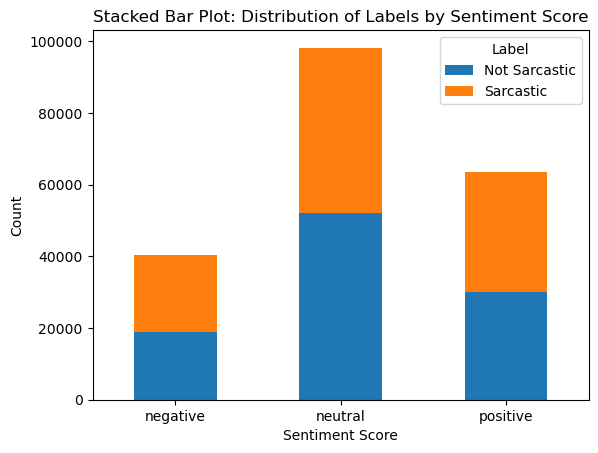

In [28]:
stacked_data = data.groupby(['weighted_comment_sentiment_score', 'label']).size().unstack().fillna(0)

stacked_data.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot: Distribution of Labels by Sentiment Score')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Label', labels=['Not Sarcastic', 'Sarcastic'])
plt.show()

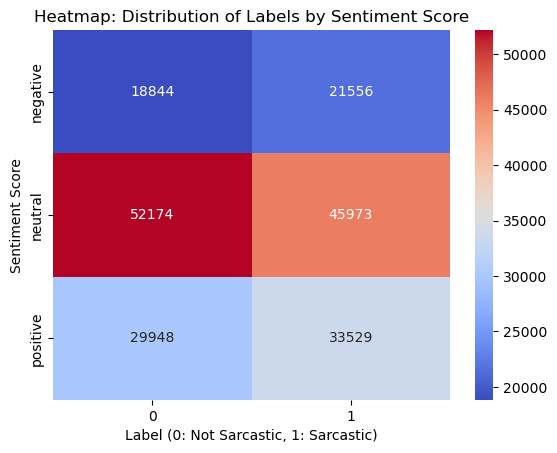

In [29]:
heatmap_data = data.groupby(['weighted_comment_sentiment_score', 'label']).size().unstack().fillna(0)
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='coolwarm')
plt.title('Heatmap: Distribution of Labels by Sentiment Score')
plt.xlabel('Label (0: Not Sarcastic, 1: Sarcastic)')
plt.ylabel('Sentiment Score')
plt.show()

In [30]:
# One Hot Encode Weighted Sentiment Scores
data = pd.get_dummies(data, columns = ['weighted_parent_sentiment_score','weighted_comment_sentiment_score'], drop_first=True)

In [31]:
data.head()

,comment,parent_comment,label,comment_tokens,parent_comment_tokens,comment_score,parent_comment_score,weighted_parent_sentiment_score_neutral,weighted_parent_sentiment_score_positive,weighted_comment_sentiment_score_neutral,weighted_comment_sentiment_score_positive
0,i just want his mutator for that!,"at 0:06, if you look closely you can see that ...",1,"[want, mutator, !]","[0:06, ,, look, closely, see, fake, two, ball,...",0.1511,-0.4767,0,0,1,0
1,i am the adultierest.,an adultier adult.,0,"[adultierest, .]","[adultier, adult, .]",0.0000,0.0000,1,0,1,0
2,"take a cold shower, it will help tremendously.","day 7 my balls hurt, i feel dizzy, losing conf...",0,"[take, cold, shower, ,, help, tremendously, .]","[day, 7, ball, hurt, ,, feel, dizzy, ,, losing...",0.4019,0.3178,0,1,0,1
3,"14 hours later, and she has not responded yet.",hard to keep a straight face knowing that the ...,0,"[14, hour, later, ,, not, responded, yet, .]","[hard, keep, straight, face, knowing, pillar, ...",0.0000,-0.7876,0,0,1,0
4,"""but i am such a nice guy!""",why pandas are not mating,0,"[``, nice, guy, !, '']","[panda, not, mating]",0.6114,0.0000,1,0,0,1


### Basic Text Features
- extracted these features mostly from the original sentences
- extracted token count, unique token count and mean token length

In [32]:
#data = data[['label','comment', 'parent_comment']]
###pre-tokenised###
# Word Count
data['comment_word_count'] = data['comment'].apply(lambda x: len(str(x).split()))
data['parent_comment_word_count'] = data['parent_comment'].apply(lambda x: len(str(x).split()))
data['comment_token_count'] = data['comment_tokens'].apply(lambda x: len(x))
data['parent_comment_token_count'] = data['parent_comment_tokens'].apply(lambda x: len(x))

# Unique Word Count
data['comment_unique_word_count'] = data['comment'].apply(lambda x: len(set(str(x).split())))
data['parent_comment_unique_word_count'] = data['parent_comment'].apply(lambda x: len(set(str(x).split())))
data['comment_unique_token_count'] = data['comment_tokens'].apply(lambda x: len(set(x)))
data['parent_comment_unique_token_count'] = data['parent_comment_tokens'].apply(lambda x: len(set(x)))

# Stop Word Count
stop = stopwords.words('english')
data['comment_stopword_count'] = data['comment'].apply(lambda x: len([word for word in str(x).split() if word.lower() in stop]))
data['parent_comment_stopword_count'] = data['parent_comment'].apply(lambda x: len([word for word in str(x).split() if word.lower() in stop]))

# Mean Word Length
data['comment_mean_word_length'] = data['comment'].apply(lambda x: np.mean([len(word) for word in str(x).split()]))
data['parent_comment_mean_word_length'] = data['parent_comment'].apply(lambda x: np.mean([len(word) for word in str(x).split()]))
data['comment_mean_token_length'] = data['comment_tokens'].apply(lambda x: np.mean([len(token) for token in x]))
data['parent_comment_mean_token_length'] = data['parent_comment_tokens'].apply(lambda x: np.mean([len(token) for token in x]))

# Character Count
data['comment_char_count'] = data['comment'].apply(lambda x: len(str(x)))
data['parent_comment_char_count'] = data['parent_comment'].apply(lambda x: len(str(x)))

# Punctuation Count
data['comment_punctuation_count'] = data['comment'].apply(lambda x: len([char for char in str(x) if char in string.punctuation]))
data['parent_comment_punctuation_count'] = data['parent_comment'].apply(lambda x: len([char for char in str(x) if char in string.punctuation]))

# Hashtag and Number Count
data['comment_hashtag_count'] = data['comment'].apply(lambda x: len([word for word in str(x).split() if word.startswith('#')]))
data['parent_comment_hashtag_count'] = data['parent_comment'].apply(lambda x: len([word for word in str(x).split() if word.startswith('#')]))

data['comment_number_count'] = data['comment'].apply(lambda x: len([word for word in str(x).split() if word.isdigit()]))
data['parent_comment_number_count'] = data['parent_comment'].apply(lambda x: len([word for word in str(x).split() if word.isdigit()]))

c:\Users\dxcas\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\dxcas\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\dxcas\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\dxcas\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


### Bag of Words

In [34]:
documents_comments = data['comment_tokens'].apply(lambda tokens_list:' '.join(tokens_list))
documents_parent_comments = data['parent_comment_tokens'].apply(lambda tokens_list:' '.join(tokens_list))

In [36]:
vectorizer_comments = CountVectorizer(min_df = 4)
bow_matrix_comments = vectorizer_comments.fit_transform(documents_comments)
bow_matrix_csr = csr_matrix(bow_matrix_comments)
data['comment_bow'] = [row for row in bow_matrix_csr]

vectorizer_parent_comments = CountVectorizer(min_df = 4)
bow_matrix_parent_comments = vectorizer_parent_comments.fit_transform(documents_parent_comments)
bow_matrix_csr_parent = csr_matrix(bow_matrix_parent_comments)
data['parent_comment_bow'] = [row for row in bow_matrix_csr_parent]

In [38]:
### Function to extract feature names from CSR representation
feature_names_bow = vectorizer_comments.get_feature_names_out() # to reverse
def bow_to_words(bow_vector, feature_names):
    # Convert the sparse matrix row to a dense array
    array = bow_vector.toarray().flatten()
    # Get the tokens that have a count > 0
    tokens = [feature_names[i] for i, count in enumerate(array) if count > 0]
    return tokens

### TD-IDF

In [40]:
tdvectorizer_comments = TfidfVectorizer(min_df = 4)
tdidf_matrix_comments = tdvectorizer_comments.fit_transform(documents_comments)
tdidf_matrix_csr = csr_matrix(tdidf_matrix_comments)
data['comment_tdidf'] = [row for row in tdidf_matrix_csr]

tdvectorizer_parent_comments = TfidfVectorizer(min_df = 4)
tdidf_matrix_parent_comments = tdvectorizer_parent_comments.fit_transform(documents_parent_comments)
tdidf_matrix_csr_parent = csr_matrix(tdidf_matrix_parent_comments)
data['parent_comment_tdidf'] = [row for row in tdidf_matrix_csr_parent]

In [41]:
feature_names_tfidf = tdvectorizer_comments.get_feature_names_out()
def tfidf_to_words(tfidf_row, feature_names):
    """
    Convert a TF-IDF row to its word representation.
    :param tfidf_row: A single row from a sparse matrix.
    :param feature_names: List of feature names from the TF-IDF vectorizer.
    :return: List of words from the TF-IDF row.
    """
    dense_tfidf = tfidf_row.toarray().flatten()
    words_indices = dense_tfidf.nonzero()[0]
    words = [(feature_names[index], dense_tfidf[index]) for index in words_indices]
    return words

In [44]:
# Testing out Extraction
df = data.head(10)
#print(data.columns)
#df[['comment_bow', 'comment_tdidf']]
print(df['comment_bow'].iloc[3])
print(bow_to_words(df['comment_bow'].iloc[3], feature_names_bow))
print(df['comment_tdidf'].iloc[3])
print(tfidf_to_words(df['comment_tdidf'].iloc[3], feature_names_tfidf))

  (0, 57)	1
  (0, 7643)	1
  (0, 8980)	1
  (0, 10803)	1
  (0, 13252)	1
  (0, 17707)	1
['14', 'hour', 'later', 'not', 'responded', 'yet']
  (0, 17707)	0.36500430172233606
  (0, 13252)	0.5514816853257846
  (0, 10803)	0.1501770267017365
  (0, 8980)	0.4300259710317235
  (0, 7643)	0.3774450837175129
  (0, 57)	0.4611936080879168
[('14', 0.4611936080879168), ('hour', 0.3774450837175129), ('later', 0.4300259710317235), ('not', 0.1501770267017365), ('responded', 0.5514816853257846), ('yet', 0.36500430172233606)]


In [45]:
data.to_pickle("data/data_w_feature_eng.pkl")

In [46]:
data.head()

,comment,parent_comment,label,comment_tokens,parent_comment_tokens,comment_score,parent_comment_score,weighted_parent_sentiment_score_neutral,weighted_parent_sentiment_score_positive,weighted_comment_sentiment_score_neutral,...,comment_punctuation_count,parent_comment_punctuation_count,comment_hashtag_count,parent_comment_hashtag_count,comment_number_count,parent_comment_number_count,comment_bow,parent_comment_bow,comment_tdidf,parent_comment_tdidf
0,i just want his mutator for that!,"at 0:06, if you look closely you can see that ...",1,"[want, mutator, !]","[0:06, ,, look, closely, see, fake, two, ball,...",0.1511,-0.4767,0,0,1,...,1,3,0,0,0,0,"(0, 17153)\t1","(0, 18)\t1\n (0, 14489)\t1\n (0, 5027)\t1\...","(0, 17153)\t1.0","(0, 9404)\t0.35637725579713064\n (0, 2615)\..."
1,i am the adultierest.,an adultier adult.,0,"[adultierest, .]","[adultier, adult, .]",0.0000,0.0000,1,0,1,...,1,1,0,0,0,0,,"(0, 1191)\t1",,"(0, 1191)\t1.0"
2,"take a cold shower, it will help tremendously.","day 7 my balls hurt, i feel dizzy, losing conf...",0,"[take, cold, shower, ,, help, tremendously, .]","[day, 7, ball, hurt, ,, feel, dizzy, ,, losing...",0.4019,0.3178,0,1,0,...,2,21,0,0,0,2,"(0, 15616)\t1\n (0, 3205)\t1\n (0, 14305)\...","(0, 14489)\t3\n (0, 25059)\t1\n (0, 2615)\...","(0, 16278)\t0.6163719028495169\n (0, 7369)\...","(0, 11418)\t0.10136174677471503\n (0, 26798..."
3,"14 hours later, and she has not responded yet.",hard to keep a straight face knowing that the ...,0,"[14, hour, later, ,, not, responded, yet, .]","[hard, keep, straight, face, knowing, pillar, ...",0.0000,-0.7876,0,0,1,...,2,2,0,0,1,0,"(0, 57)\t1\n (0, 7643)\t1\n (0, 8980)\t1\n...","(0, 16688)\t1\n (0, 11261)\t1\n (0, 13514)...","(0, 17707)\t0.36500430172233606\n (0, 13252...","(0, 11004)\t0.26518748090271993\n (0, 19549..."
4,"""but i am such a nice guy!""",why pandas are not mating,0,"[``, nice, guy, !, '']","[panda, not, mating]",0.6114,0.0000,1,0,0,...,3,0,0,0,0,0,"(0, 10681)\t1\n (0, 7080)\t1","(0, 16688)\t1\n (0, 17556)\t1\n (0, 15066)\t1","(0, 7080)\t0.6478591476983679\n (0, 10681)\...","(0, 15066)\t0.7518521475751829\n (0, 17556)..."
